In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [125]:
df = pd.read_csv('data.csv')

print(df.columns[9]) 
print(df.columns[21])

To the nearest dollar, what is the maximum you would spend for a truly GREAT haircut?  (Just give the number! No units)
How would you describe the political affiliation of your parents?


In [126]:
haircut = df["To the nearest dollar, what is the maximum you would spend for a truly GREAT haircut?  (Just give the number! No units)"]
print(haircut)

0     100
1     100
2      50
3      60
4     100
     ... 
76    150
77    200
78    100
79    150
80    100
Name: To the nearest dollar, what is the maximum you would spend for a truly GREAT haircut?  (Just give the number! No units), Length: 81, dtype: int64


In [127]:
political_affiliation = df["How would you describe the political affiliation of your parents?"]
print(political_affiliation)

0              center
1              center
2              center
3      left of center
4      left of center
           ...       
76     left of center
77           far left
78    right of center
79     left of center
80             center
Name: How would you describe the political affiliation of your parents?, Length: 81, dtype: object


In [270]:
far_left = np.array([])
for i in range(80):
    if (political_affiliation[i] == "far left"):
        far_left = np.append(far_left, int(haircut[i]))
far_left = far_left.astype('int32')
left_of_center = np.array([])
for i in range(80):
    if (political_affiliation[i] == "left of center"):
        left_of_center = np.append(left_of_center, int(haircut[i]))
left_of_center = left_of_center.astype('int32')
center = np.array([])
for i in range(80):
    if (political_affiliation[i] == "center"):
        center = np.append(center, int(haircut[i]))
center = center.astype('int32')
right_of_center = np.array([])
for i in range(80):
    if (political_affiliation[i] == "right of center"):
        right_of_center = np.append(right_of_center, int(haircut[i]))
right_of_center = right_of_center.astype('int32')
far_right = np.array([])
for i in range(80):
    if (political_affiliation[i] == "far right"):
        far_right = np.append(far_right, int(haircut[i]))
far_right = far_right.astype('int32')

print("far left:")
print(far_left)
print("\nleft of center:")
print(left_of_center)
print("\ncenter:")
print(center)
print("\nright of center:")
print(right_of_center)
print("\nfar right:")
print(far_right)

far left:
[ 20 100 300 100 100  40 100 200]

left of center:
[ 60 100  33  30  50 100  50 250  50  45 200  60 300  45 100 150 140 300
  40   0  50 100  30 200  50   0  50  60 150 150]

center:
[100 100  50  80 100 100  80  90  35  60  85  20  60  60 120 200 200  40
  80  30  50  40  70  90  35  60 100]

right of center:
[ 25  60 110  50 120 500  25  25 115 200  50 100 100]

far right:
[ 70 200]


In [271]:
def dot_diagram(dataset, title):
    values, counts = np.unique(dataset, return_counts=True)
    width = 25
    height = 1
    marker_size = 3
    fig, ax = plt.subplots(figsize=(width, height))
    for value, count in zip(values, counts):
        ax.plot([value]*count, list(range(count)), marker='o', color='tab:blue',
                ms=marker_size, linestyle='')
    for spine in ['top', 'right', 'left']:
        ax.spines[spine].set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_ylim(-1, max(counts))
    ax.set_xticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500])
    ax.tick_params(axis='x', length=0, pad=10)
    ax.set_xlabel(title)

def box_plot(dataset, title, labels):
    fig = plt.figure(figsize =(10, 3))
    ax = fig.add_subplot(111)
    ax.boxplot(dataset, vert=0)
    ax.set_yticklabels(labels)
    plt.title(title)
    plt.show()

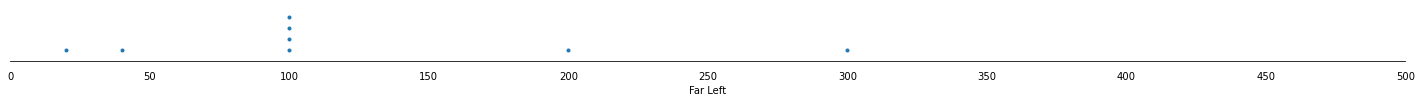

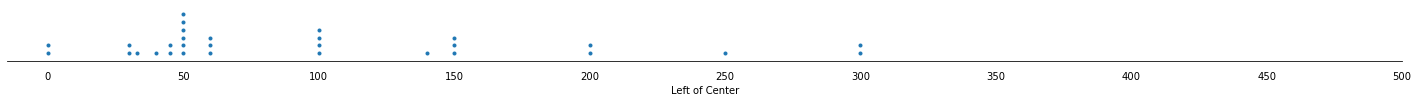

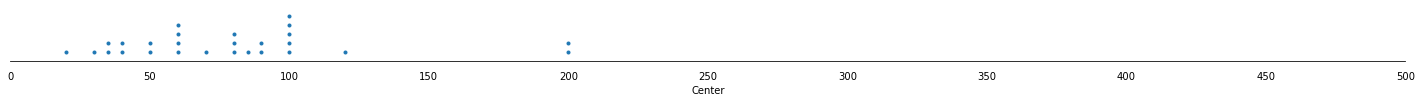

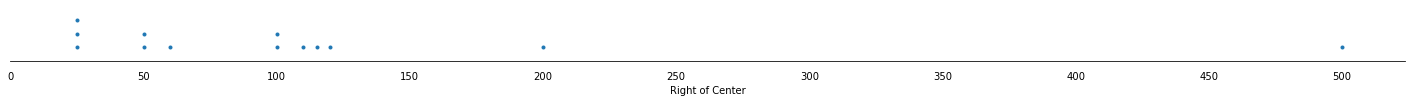

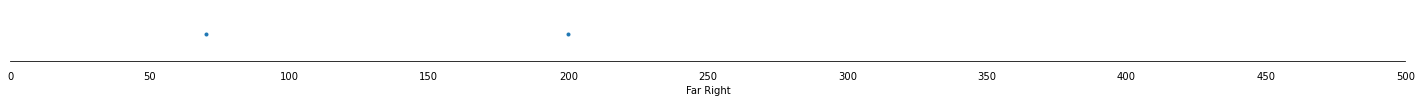

In [272]:
dot_diagram(far_left, "Far Left")
# box_plot(far_left, "Title", ["Far Left"])
dot_diagram(left_of_center, "Left of Center")
# box_plot(left_of_center,"Title", ["Far Left"])
dot_diagram(center, "Center")
# box_plot(center,"Title", ["Far Left"])
dot_diagram(right_of_center, "Right of Center")
# box_plot(right_of_center,"Title", ["Far Left"])
dot_diagram(far_right, "Far Right")
# box_plot(far_right,"Title", ["Far Left"])


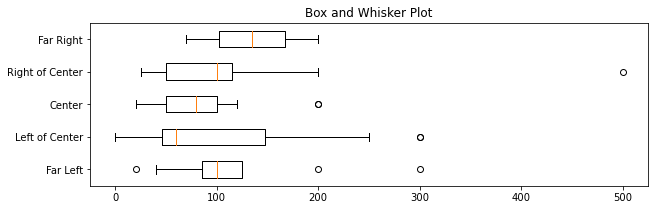

In [273]:
box_plot([far_left, left_of_center, center, right_of_center, far_right], "Box and Whisker Plot", ["Far Left", "Left of Center", "Center", "Right of Center", "Far Right"])


In [274]:
print(f'{"Far Left Mean: "}{far_left.mean()}')
print(f'{"Left of Center Mean: "}{left_of_center.mean()}')
print(f'{"Center Mean: "}{center.mean()}')
print(f'{"Right of Center Mean: "}{right_of_center.mean()}')
print(f'{"Far Right Mean: "}{far_right.mean()}')

Far Left Mean: 120.0
Left of Center Mean: 98.1
Center Mean: 79.07407407407408
Right of Center Mean: 113.84615384615384
Far Right Mean: 135.0


In [275]:
print(f'{"Far Left Standard Deviation: "}{np.std(far_left)}')
print(f'{"Left of Center Standard Deviation: "}{np.std(left_of_center)}')
print(f'{"Center Standard Deviation: "}{np.std(center)}')
print(f'{"Right of Center Standard Deviation: "}{np.std(right_of_center)}')
print(f'{"Far Right Standard Deviation: "}{np.std(far_right)}')

Far Left Standard Deviation: 84.26149773176358
Left of Center Standard Deviation: 80.67025474113738
Center Standard Deviation: 42.796612816753445
Right of Center Standard Deviation: 121.43617896710263
Far Right Standard Deviation: 65.0


In [276]:
print(f'{"Far Left Median: "}{np.median(far_left)}')
print(f'{"Left of Center Median: "}{np.median(left_of_center)}')
print(f'{"Center Median: "}{np.median(center)}')
print(f'{"Right of Center Median: "}{np.median(right_of_center)}')
print(f'{"Far Right Median: "}{np.median(far_right)}')

Far Left Median: 100.0
Left of Center Median: 60.0
Center Median: 80.0
Right of Center Median: 100.0
Far Right Median: 135.0


In [277]:
def IQR(dist):
    return np.percentile(dist, 75) - np.percentile(dist, 25)

print(f'{"Far Left IQR: "}{IQR(far_left)}')
print(f'{"Left of Center IQR: "}{IQR(left_of_center)}')
print(f'{"Center IQR: "}{IQR(center)}')
print(f'{"Right of Center IQR: "}{IQR(right_of_center)}')
print(f'{"Far Right IQR: "}{IQR(far_right)}')

Far Left IQR: 40.0
Left of Center IQR: 101.25
Center IQR: 50.0
Right of Center IQR: 65.0
Far Right IQR: 65.0


In [278]:
def getOutliers(dist):
    iqr = IQR(dist)
    outliers = np.array([])
    for data in dist:
        if data > (1.5 * iqr + np.percentile(dist, 75)) or data < (np.percentile(dist, 25) - 1.5 * iqr):
            outliers = np.append(outliers, data)
    return np.sort(outliers)

print(f'{"Far Left Outliers: "}{getOutliers(far_left)}')
print(f'{"Left of Center Outliers: "}{getOutliers(left_of_center)}')
print(f'{"Center Outliers: "}{getOutliers(center)}')
print(f'{"Right of Center Outliers: "}{getOutliers(right_of_center)}')
print(f'{"Far Right Outliers: "}{getOutliers(far_right)}')

Far Left Outliers: [ 20. 200. 300.]
Left of Center Outliers: [300. 300.]
Center Outliers: [200. 200.]
Right of Center Outliers: [500.]
Far Right Outliers: []
